This notebook encases the police shootings and which states have higher record of shootings.

In [1]:
#For DataFrame
import pandas as pd
import numpy as np

#For Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../input/data-police-shootings/fatal-police-shootings-data.csv")

In [3]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
df.shape

(5416, 14)

# Exploratory Data Analysis 

In [5]:
df.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      227
age                        235
gender                       2
race                       521
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
dtype: int64

This shows the columns where the values are not empty. These rows can be discarded or filled with an appropriate value.

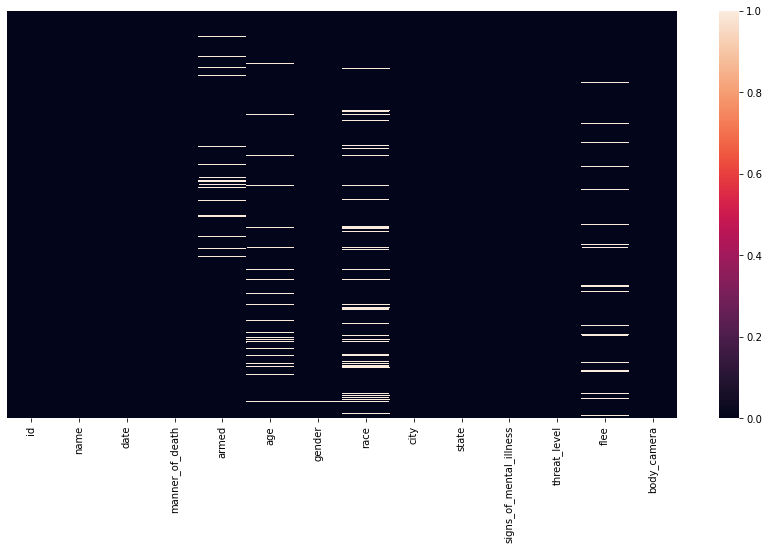

In [6]:
fig, ax = plt.subplots(figsize=(15,7.5))   
sns.heatmap(df.isnull(),yticklabels=False, ax=ax)

The heatmap for the values that are missing in the columns. This shows where more number of values are missing from starting to the end.

In [7]:
df.groupby("race").count()

,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera
race,,,,,,,,,,,,,
A,93,93,93,93,90,91,93,93,93,93,93,88,93
B,1298,1298,1298,1298,1234,1274,1298,1298,1298,1298,1298,1248,1298
H,902,902,902,902,857,878,902,902,902,902,902,852,902
N,78,78,78,78,75,77,78,78,78,78,78,73,78
O,48,48,48,48,45,47,48,48,48,48,48,47,48
W,2476,2476,2476,2476,2377,2443,2475,2476,2476,2476,2476,2380,2476


Grouping of DataFrame by race.

In [8]:
df.replace(to_replace = ['A'], value = ['Asian'], inplace = True)
df.replace(to_replace = ['B'], value = ['Black Non-Hispanic'], inplace = True)
df.replace(to_replace = ['H'], value = ['Hispanic'], inplace = True)
df.replace(to_replace = ['N'], value = ['Native American'], inplace = True)
df.replace(to_replace = ['O'], value = ['Other'], inplace = True)
df.replace(to_replace = ['W'], value = ['White Non-Hispanic'], inplace = True)

Changing of values from Abbreviations to actual category names they belong to as it is much easier to read this way.

In [9]:
df.groupby("gender").count()

,id,name,date,manner_of_death,armed,age,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
gender,,,,,,,,,,,,,
F,238,238,238,238,222,229,222,238,238,238,238,229,238
M,5176,5176,5176,5176,4965,4951,4672,5176,5176,5176,5176,4936,5176


Grouping of DataFrame by Gender.

In [10]:
df.groupby("body_camera").count()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee
body_camera,,,,,,,,,,,,,
False,4798,4798,4798,4798,4591,4579,4796,4317,4798,4798,4798,4798,4573
True,618,618,618,618,598,602,618,578,618,618,618,618,594


Grouping of DataFrame by body camera.

In [11]:
df["armed"].value_counts()

gun                3060
knife               792
unarmed             353
toy weapon          186
undetermined        164
                   ... 
metal hand tool       1
ice pick              1
chainsaw              1
pen                   1
cordless drill        1
Name: armed, Length: 93, dtype: int64

Grouping of DataFrame by the weapon being carried.

In [12]:
df["threat_level"].value_counts()

attack          3495
other           1682
undetermined     239
Name: threat_level, dtype: int64

Grouping of DataFrame by threat level.

In [13]:
df['manner_of_death'].value_counts()

shot                5146
shot and Tasered     270
Name: manner_of_death, dtype: int64

Grouping of DataFrame by manner of death.

In [14]:
df['flee'].value_counts()

Not fleeing    3411
Car             900
Foot            692
Other           164
Name: flee, dtype: int64

Grouping of DataFrame by the attempt to flee.

In [15]:
df['age'].value_counts()

31.0    186
25.0    183
33.0    171
27.0    171
29.0    169
       ... 
89.0      1
12.0      1
78.0      1
13.0      1
79.0      1
Name: age, Length: 77, dtype: int64

Grouping of DataFrame by Age.

In [16]:
df['signs_of_mental_illness'].value_counts()

False    4200
True     1216
Name: signs_of_mental_illness, dtype: int64

Grouping of DataFrame by mental illness.

In [17]:
df['date'].value_counts()

2020-05-26    9
2018-02-01    9
2018-01-06    9
2019-01-28    9
2018-04-01    9
             ..
2015-01-19    1
2018-09-28    1
2019-10-04    1
2020-02-28    1
2017-09-07    1
Name: date, Length: 1844, dtype: int64

Grouping of DataFrame by the date they were shot at.

In [18]:
df['date'] = df['date'].apply(str)
df[['Year','Month','Day']] = df.date.apply(   lambda x: pd.Series(str(x).split("-")))
df.drop(['Month','Day','date'],axis = 'columns',inplace = True)
df['Year'] = df['Year'].apply(int)

Conversion of date to the particular year only. Removal of date and month takes place so that it becomes easier to categorize.

In [19]:
df.head()

,id,name,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Year
0,3,Tim Elliot,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,2015
1,4,Lewis Lee Lembke,shot,gun,47.0,M,White Non-Hispanic,Aloha,OR,False,attack,Not fleeing,False,2015
2,5,John Paul Quintero,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,2015
3,8,Matthew Hoffman,shot,toy weapon,32.0,M,White Non-Hispanic,San Francisco,CA,True,attack,Not fleeing,False,2015
4,9,Michael Rodriguez,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,2015


This shows Date being dropped from the DataFrame and Year being added at the end.

In [20]:
df['Year'].value_counts()

2019    1002
2015     994
2018     991
2017     986
2016     962
2020     481
Name: Year, dtype: int64

Grouping of DataFrame by cases in years.

In [21]:
df['city'].value_counts()

Los Angeles      85
Phoenix          78
Houston          57
Las Vegas        45
San Antonio      43
                 ..
Willoughby        1
Elk Plain         1
Missouri City     1
Viera             1
Littlefield       1
Name: city, Length: 2470, dtype: int64

Grouping of DataFrame by City.

In [22]:
df['state'].value_counts()

CA    799
TX    481
FL    350
AZ    254
CO    195
GA    182
OK    164
NC    156
OH    155
WA    152
MO    141
TN    139
LA    109
PA    108
NM    106
AL    104
IL    104
NY    101
NV     96
IN     95
VA     95
KY     95
WI     91
OR     88
SC     88
AR     83
MD     79
MI     78
NJ     68
MS     65
MN     61
UT     60
WV     54
KS     50
ID     42
AK     39
MA     35
IA     32
MT     31
HI     30
NE     24
ME     22
CT     21
SD     17
WY     14
NH     13
DE     13
DC     13
ND     11
VT      9
RI      4
Name: state, dtype: int64

Grouping of DataFrame by state,

# Univariate Data Analysis by plotting

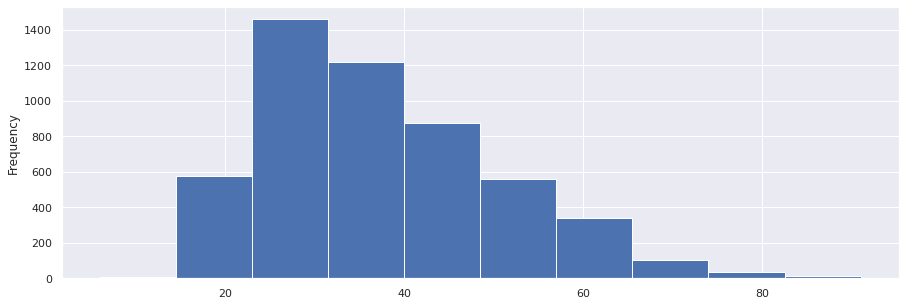

In [23]:
sns.set(rc={'figure.figsize':(15,5)})
df["age"].plot.hist()

This shows the age of the people killed. According to the data, 20-40 age span has the highest number of cases.

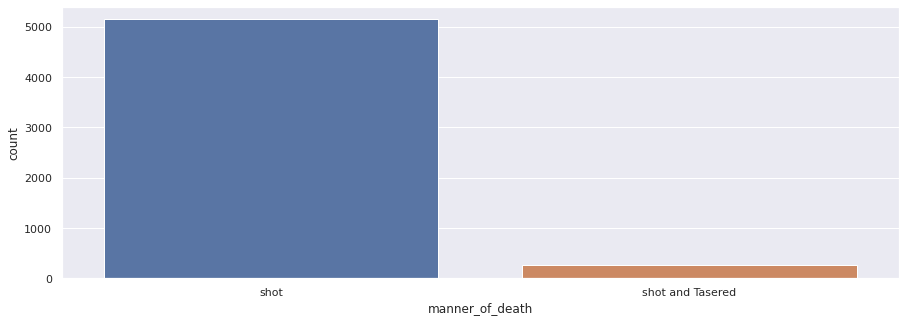

In [24]:
sns.countplot(x = "manner_of_death", data = df)

The manner of death of the people.

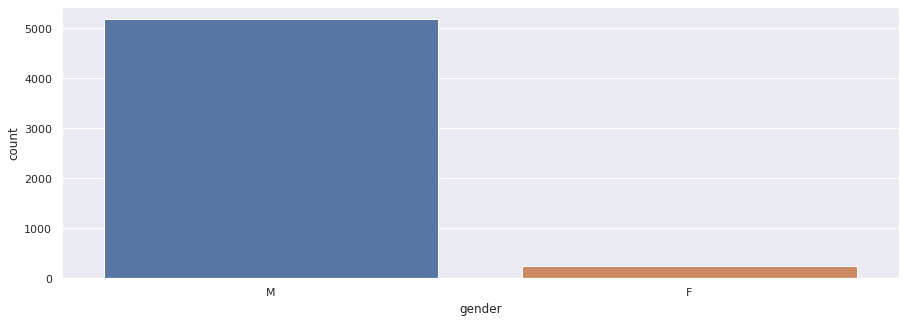

In [25]:
sns.countplot(x = "gender", data = df)

The gender of the people killed.

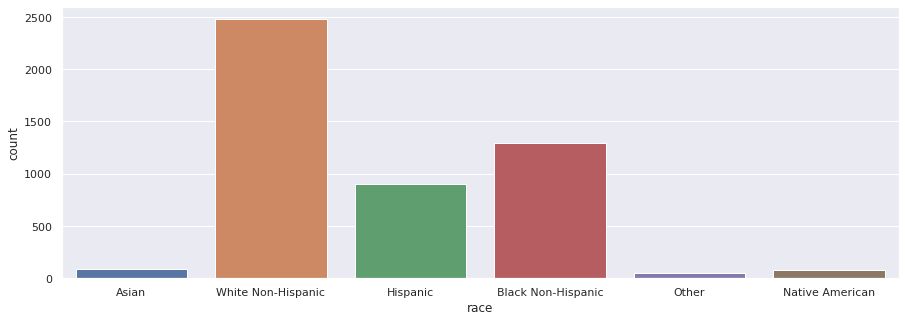

In [26]:
sns.countplot(x = "race", data = df)

The race of the people killed.

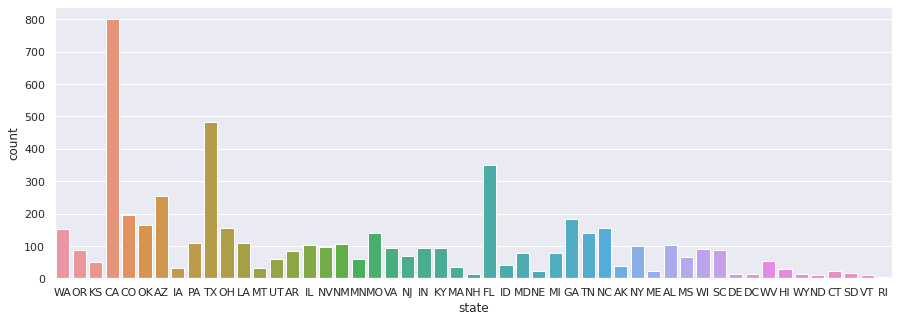

In [27]:
sns.countplot(x = "state", data = df)

The states where the shootings occured. 

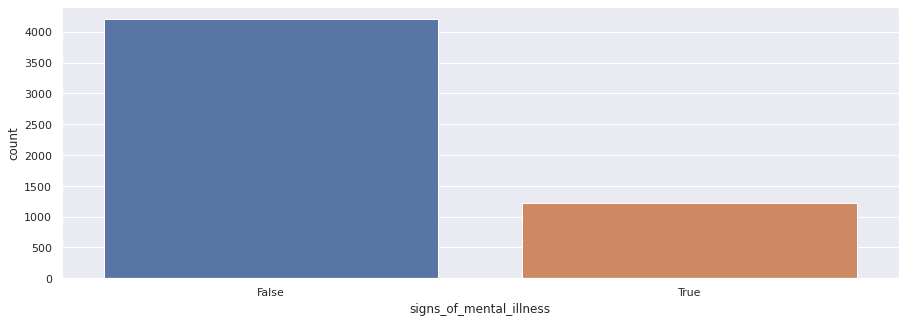

In [28]:
sns.countplot(x = "signs_of_mental_illness", data = df)

This shows whether the people shot showed signs of mental illness.

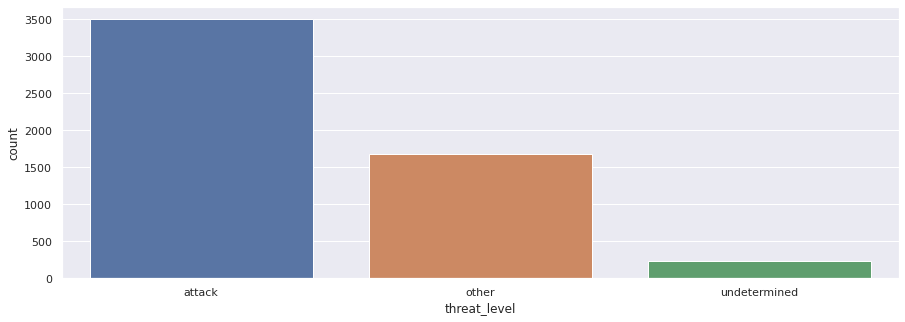

In [29]:
sns.countplot(x = "threat_level", data = df)

The various threat level the people killed posed.

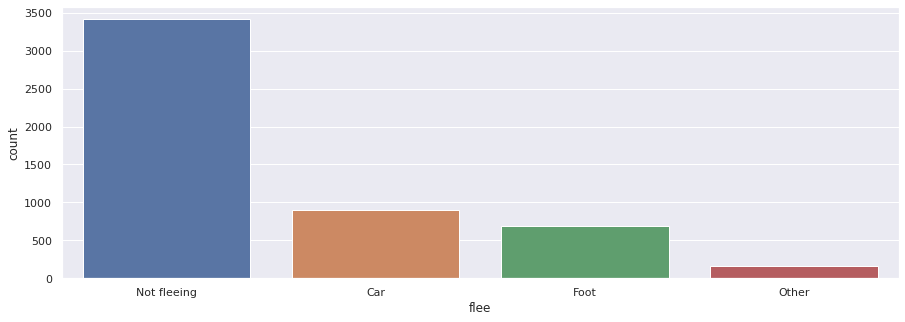

In [30]:
sns.countplot(x = "flee", data = df)

The cases of not fleeing are high whereas the cases of fleeing are at a low number.

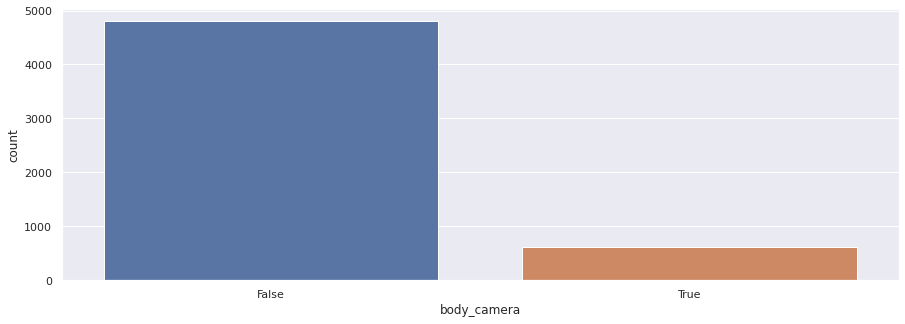

In [31]:
sns.countplot(x = "body_camera", data = df)

This shows when the people were shot whether the officer had body camera for recording the incident.

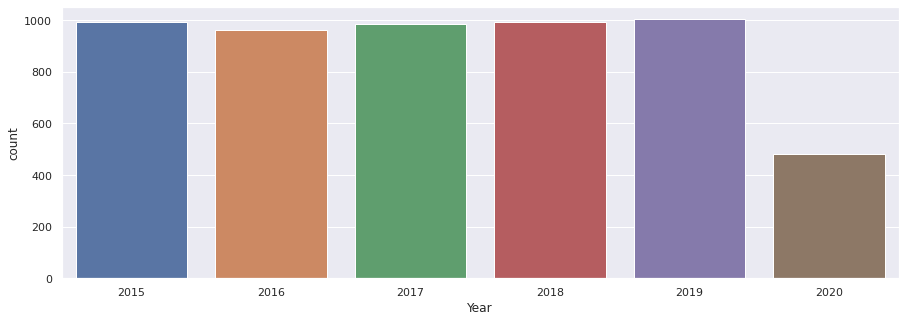

In [32]:
sns.countplot(x = "Year", data = df)

The shootings that occured over the years. The 2020 data is less as it was only recorded till 2020 to the month of June.

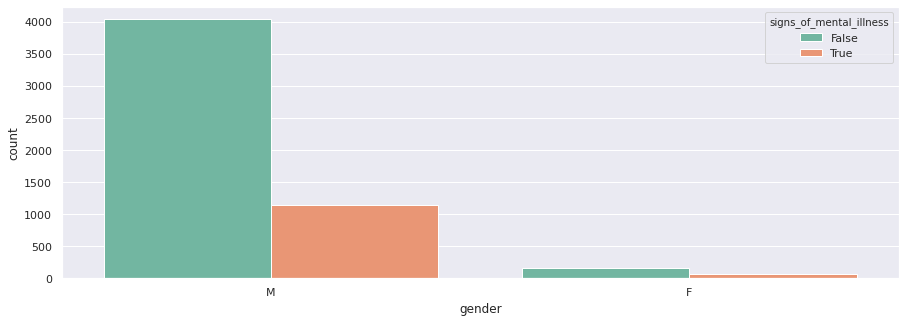

In [33]:
sns.countplot(x = "gender", hue = "signs_of_mental_illness",data = df, palette = 'Set2')

Gender and Signs of Mental Illnesses has little dependence on each other.

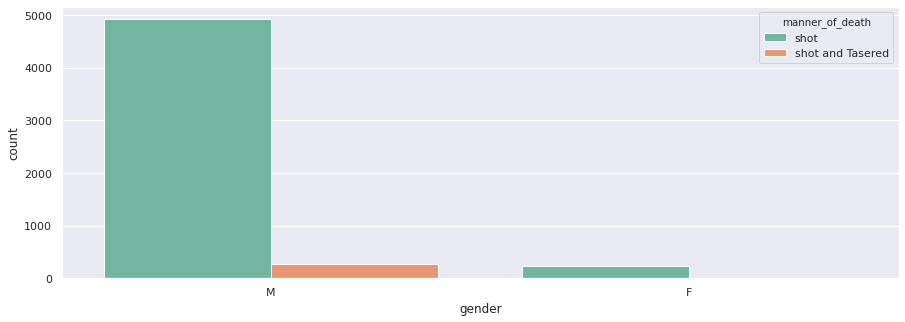

In [34]:
sns.countplot(x = "gender", hue = "manner_of_death",data = df, palette = 'Set2')

Only men were tasered and shot. This was not the case for females.

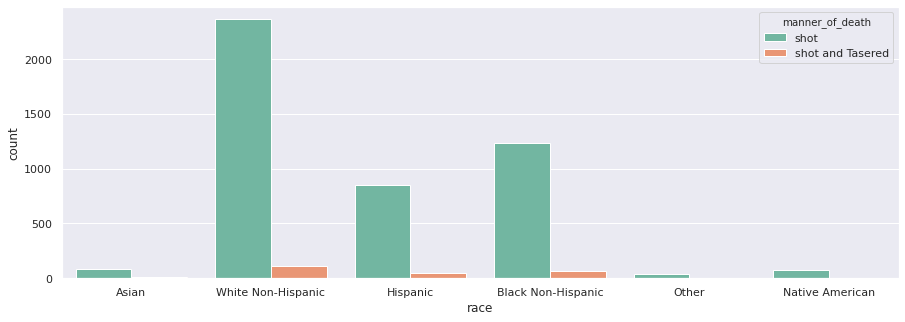

In [35]:
sns.countplot(x = "race", hue = "manner_of_death",data = df, palette = 'Set2')

The races which were tasered and shot.

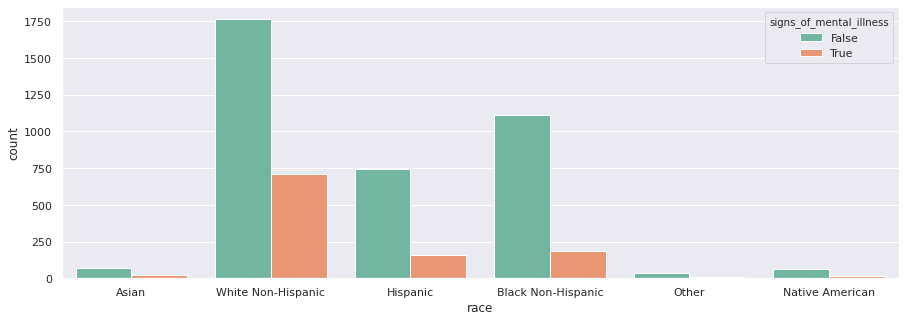

In [36]:
sns.countplot(x = "race", hue = "signs_of_mental_illness",data = df, palette = 'Set2')

The races showing mental illness and which were not showing mental illness.

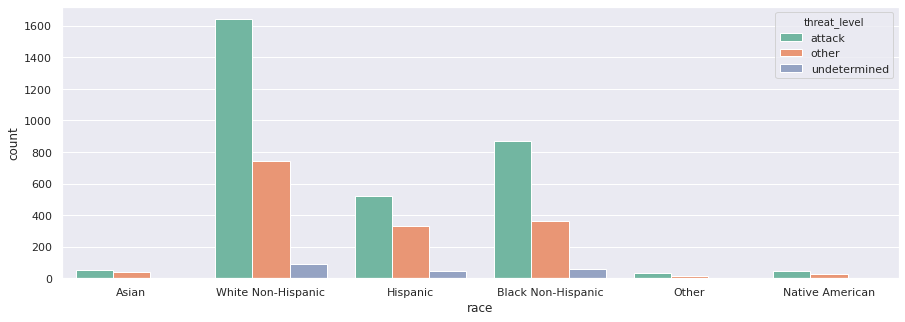

In [37]:
sns.countplot(x = "race", hue = "threat_level",data = df, palette = 'Set2')

The threat level posed by the people by race.

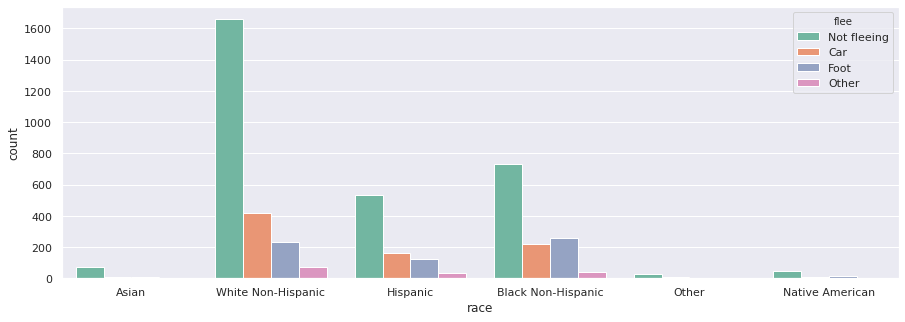

In [38]:
sns.countplot(x = "race", hue = "flee",data = df, palette = 'Set2')

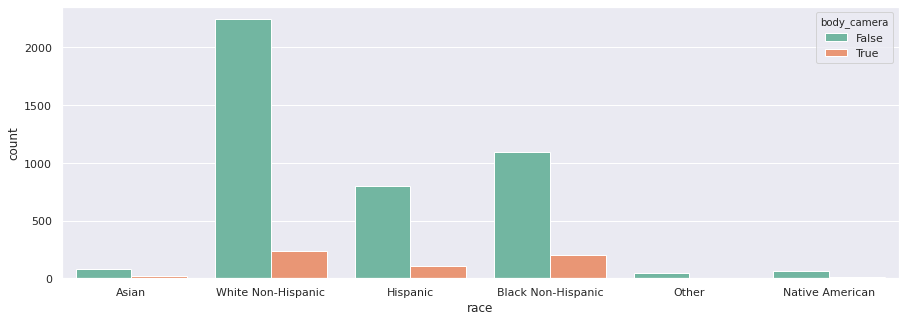

In [39]:
sns.countplot(x = "race", hue = "body_camera",data = df, palette = 'Set2')

This shows whether body camera was recording while the person was shot.

# Bivariate Data Analysis by plotting

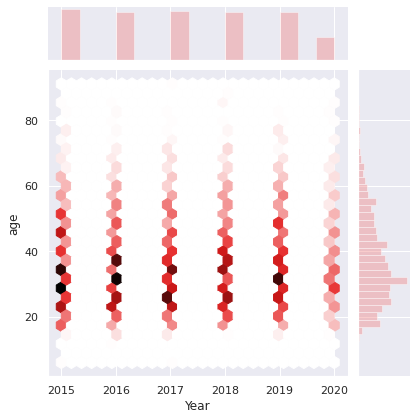

In [40]:
sns.axes_style('whitegrid')
sns.jointplot(x = df['Year'], y =df['age'], kind = 'hex',color = 'lightcoral')

The dependence of Age and Year. The values where black hexagonal values are present shows that people are present more in average.

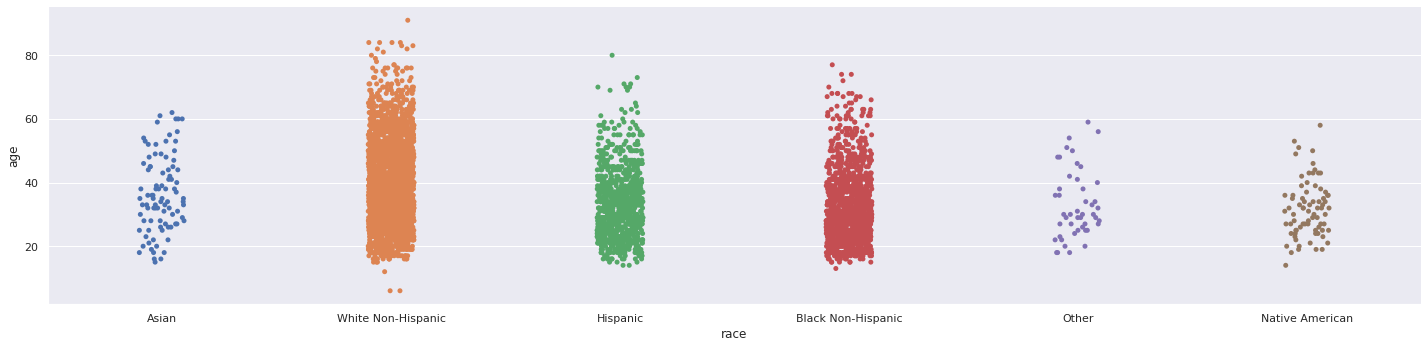

In [41]:
sns.catplot(x = 'race',y='age', kind = 'strip', data = df,aspect = 4)

Relation of race and age of the person killed.

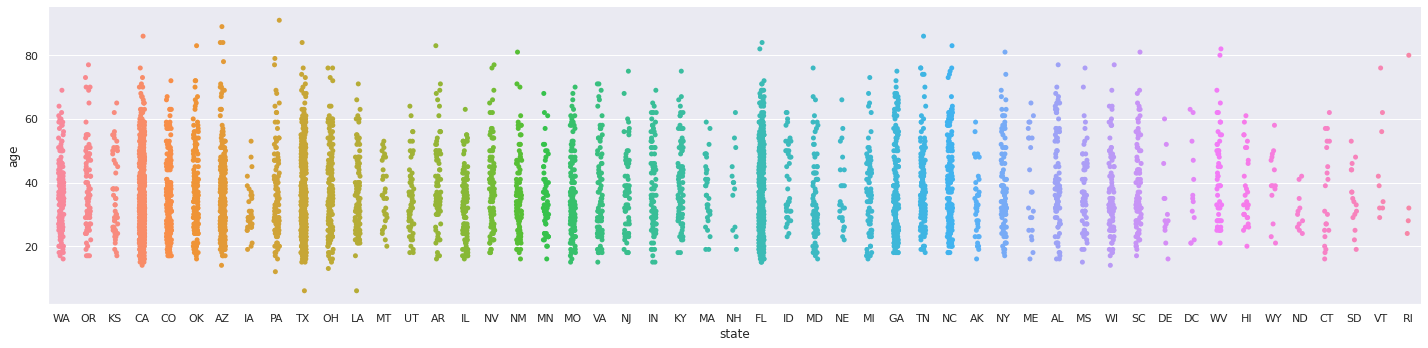

In [42]:
sns.catplot(x = 'state',y='age', kind = 'strip', data = df,aspect = 4)

Relation of race and state to which the person killed belonged.

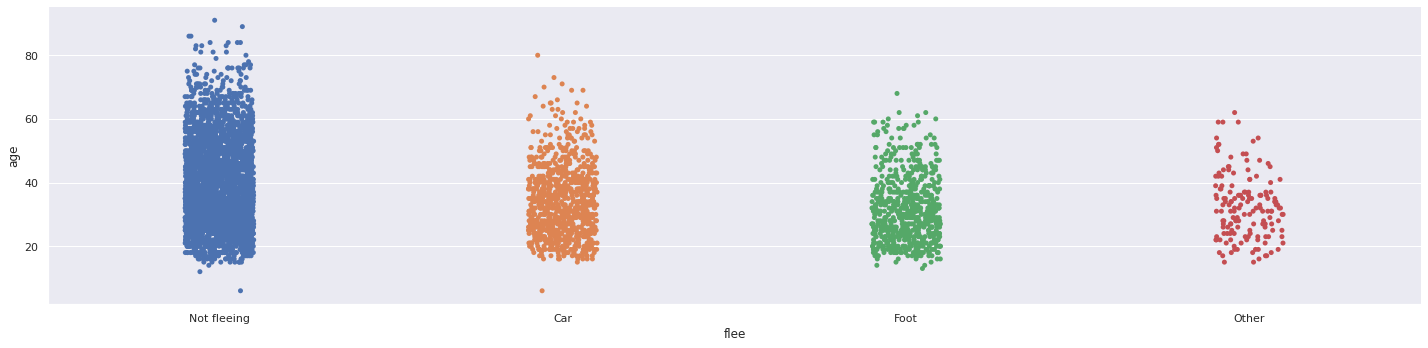

In [43]:
sns.catplot(x = 'flee',y='age', kind = 'strip', data = df,aspect = 4)

Relation of attempt to flee and age of the person killed.

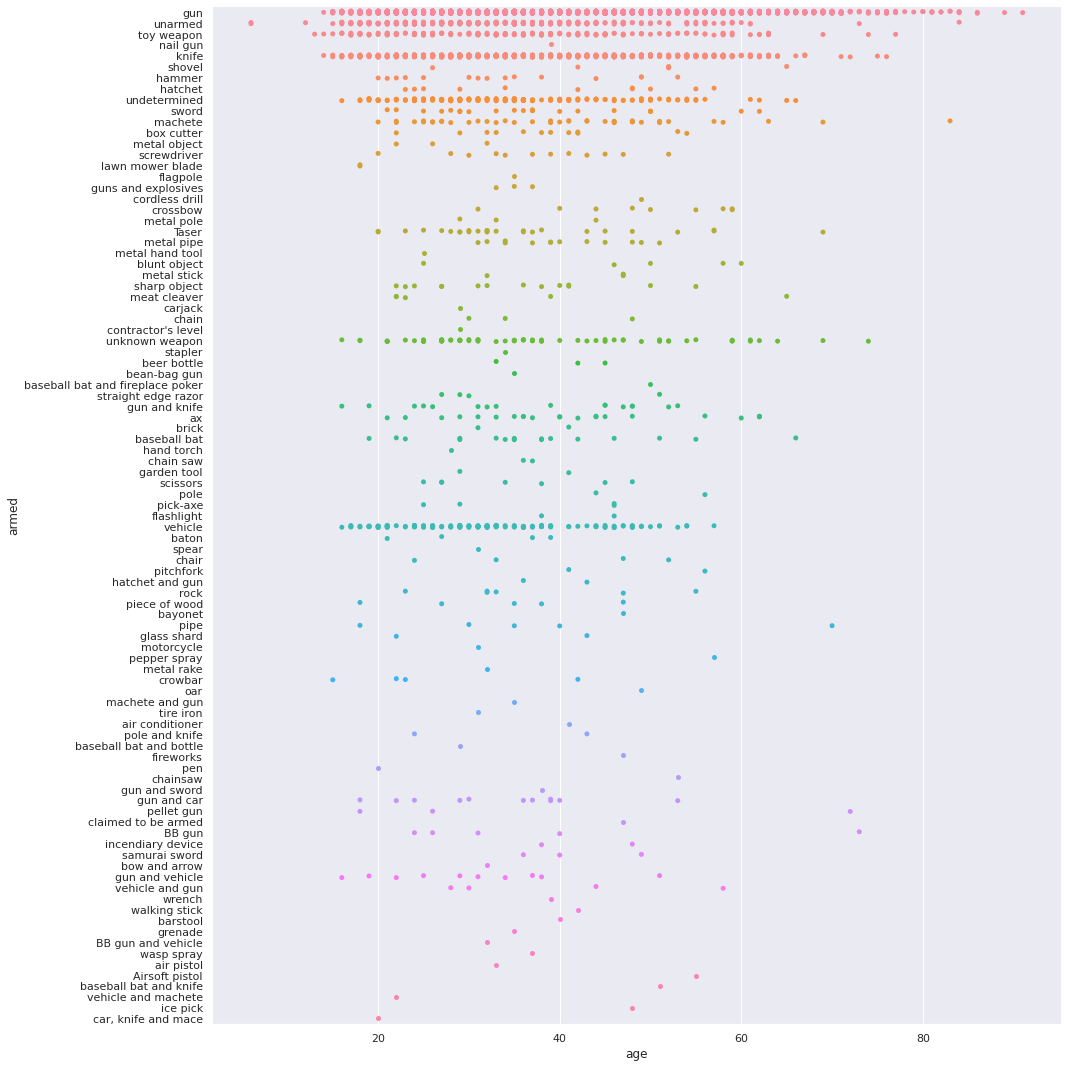

In [44]:
sns.catplot(x = 'age',y='armed', kind = 'strip', data = df,height = 15)

This shows the relation whether the person was armed and the weapon being carried at particular age.

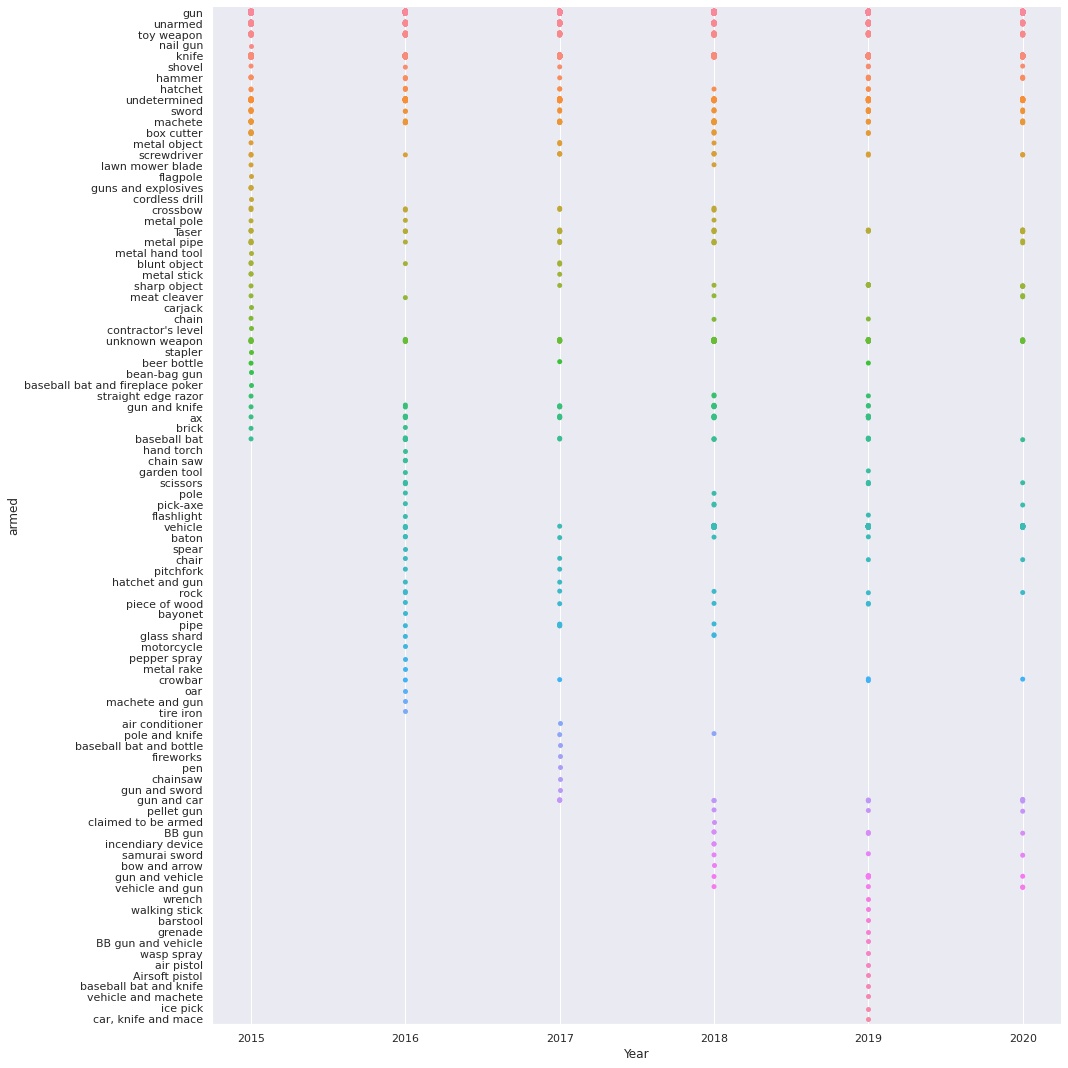

In [45]:
sns.catplot(x = 'Year',y='armed', kind = 'strip', data = df,height = 15)

The kind of weapon being carried and the Year in which such weapons were present.

![Explanation of Box Plot](https://www.simplypsychology.org/boxplot.jpg)

Max means the maximum value of records for the boxplot.

Upper Quartile encompasses the 75% of the population in the box plot.

Lower Quartile encompasses the 25% of the population in the box plot.

Inter Quartile encompasses the 25-75% of the population in the box plot. 

Median represents the middle value of the population of the category.

Min represents the minimum value from where records start for boxplot.

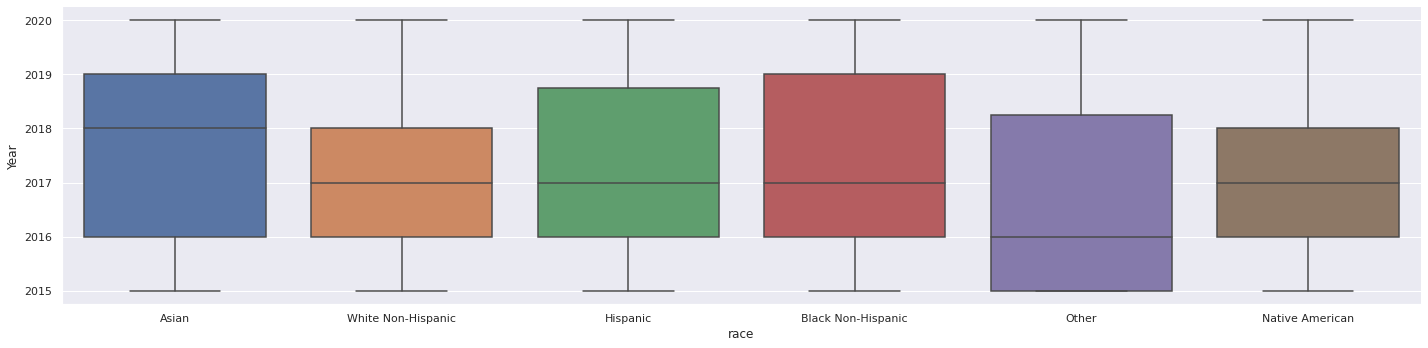

In [46]:
sns.catplot(x = 'race',y='Year', kind = 'box', data = df,aspect = 4)

This shows the values over the years for the races being killed.

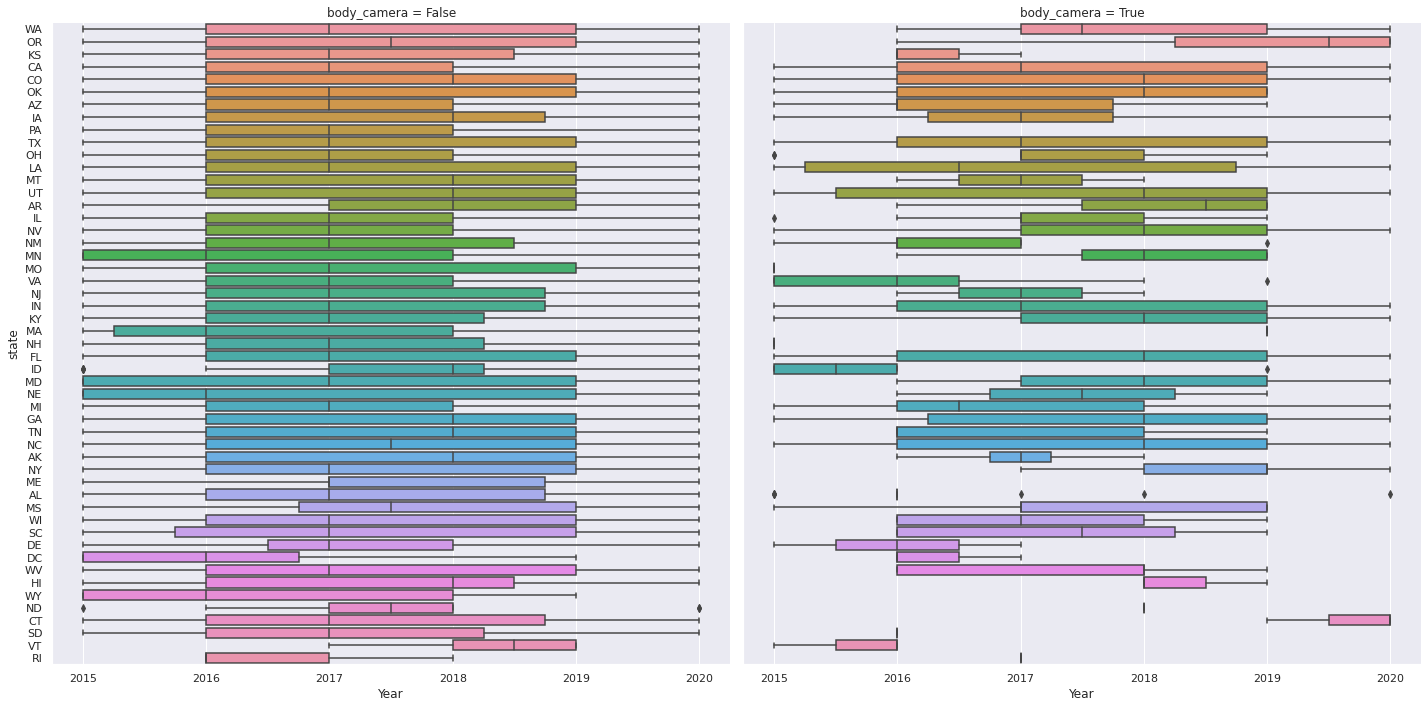

In [47]:
sns.catplot(x = 'Year',y='state', kind = 'box', data = df,height = 10, col = 'body_camera')

State and the number of people in a year killed.This also shows whether the officer had recorded the incident or not.

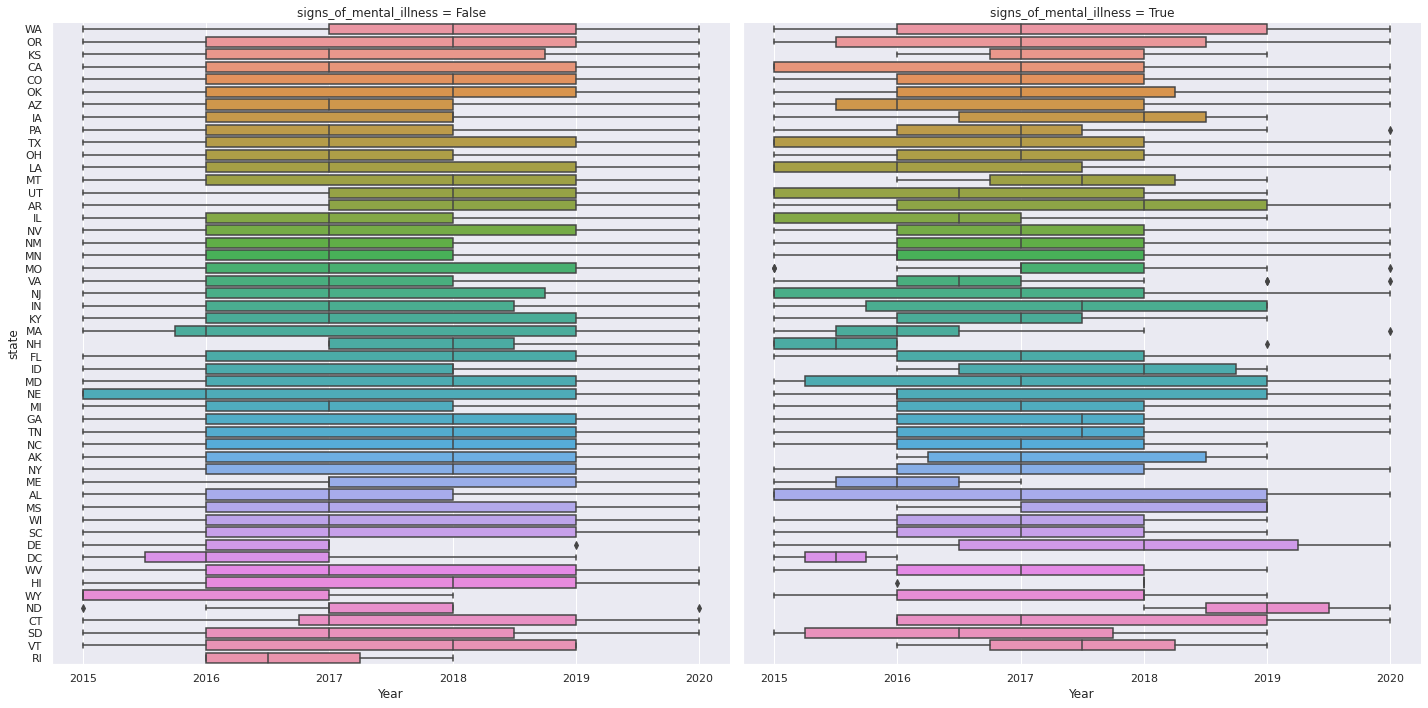

In [48]:
sns.catplot(x = 'Year',y='state', kind = 'box', data = df,height = 10, col = 'signs_of_mental_illness')

The people killed in different states over the years. The different columns are for whether they showed signs of being mentally ill.

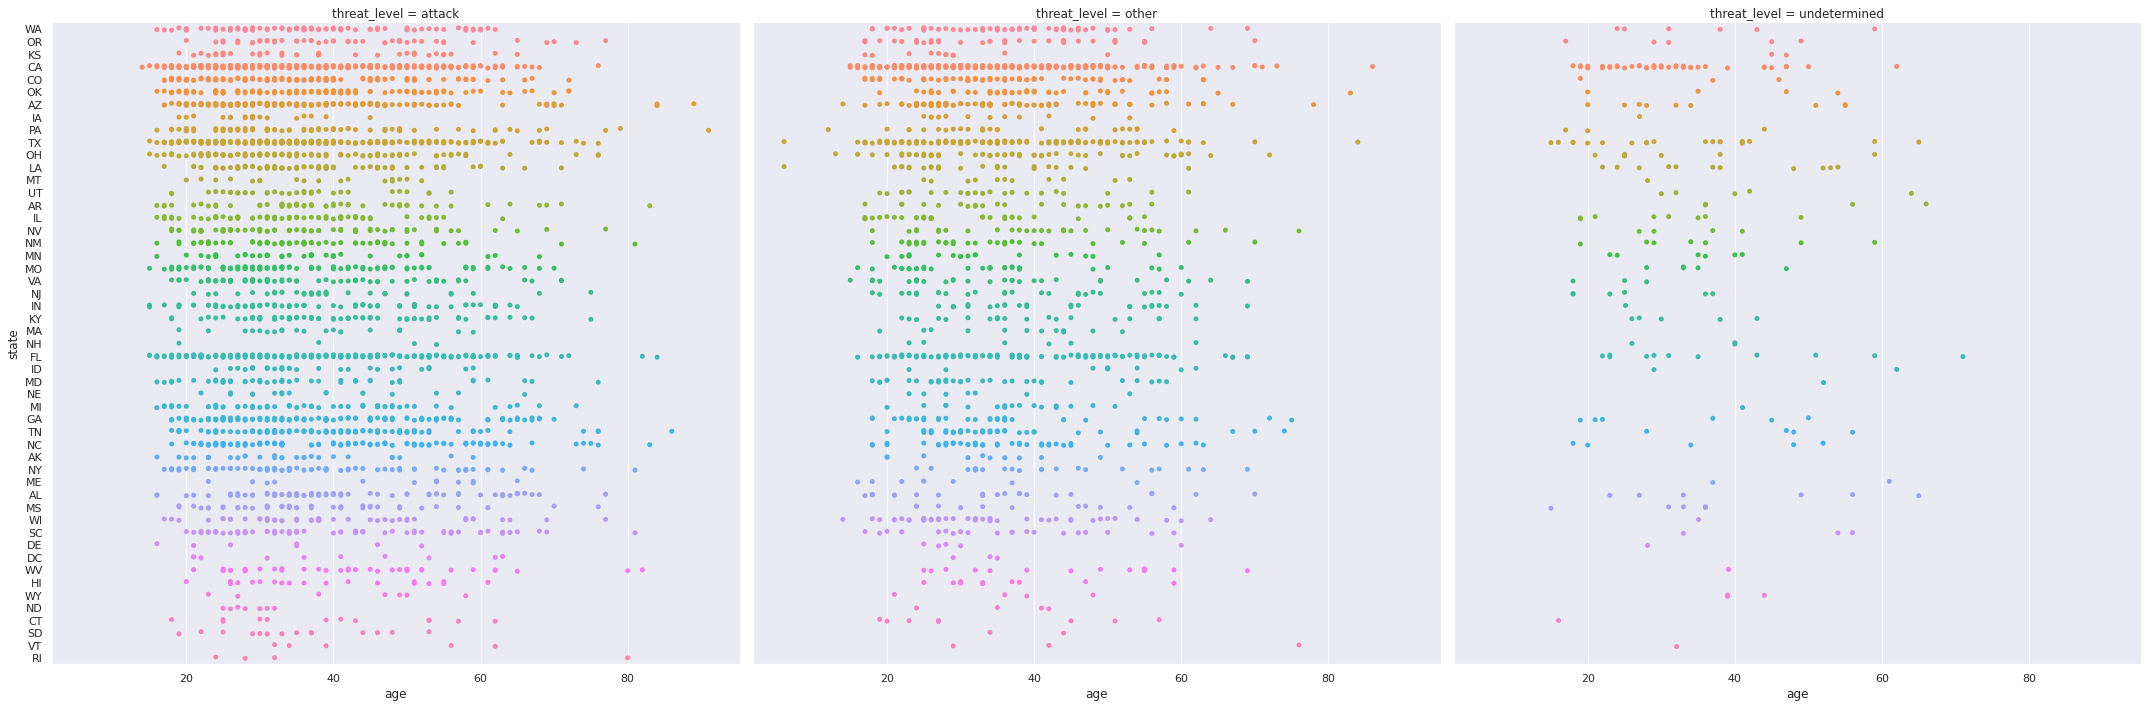

In [49]:
sns.catplot(x = 'age',y='state', kind = 'strip', data = df,height = 10, col = 'threat_level')

This shows the threat level posed by the person and whether threat level was higher for people with lower ages or higher ages.

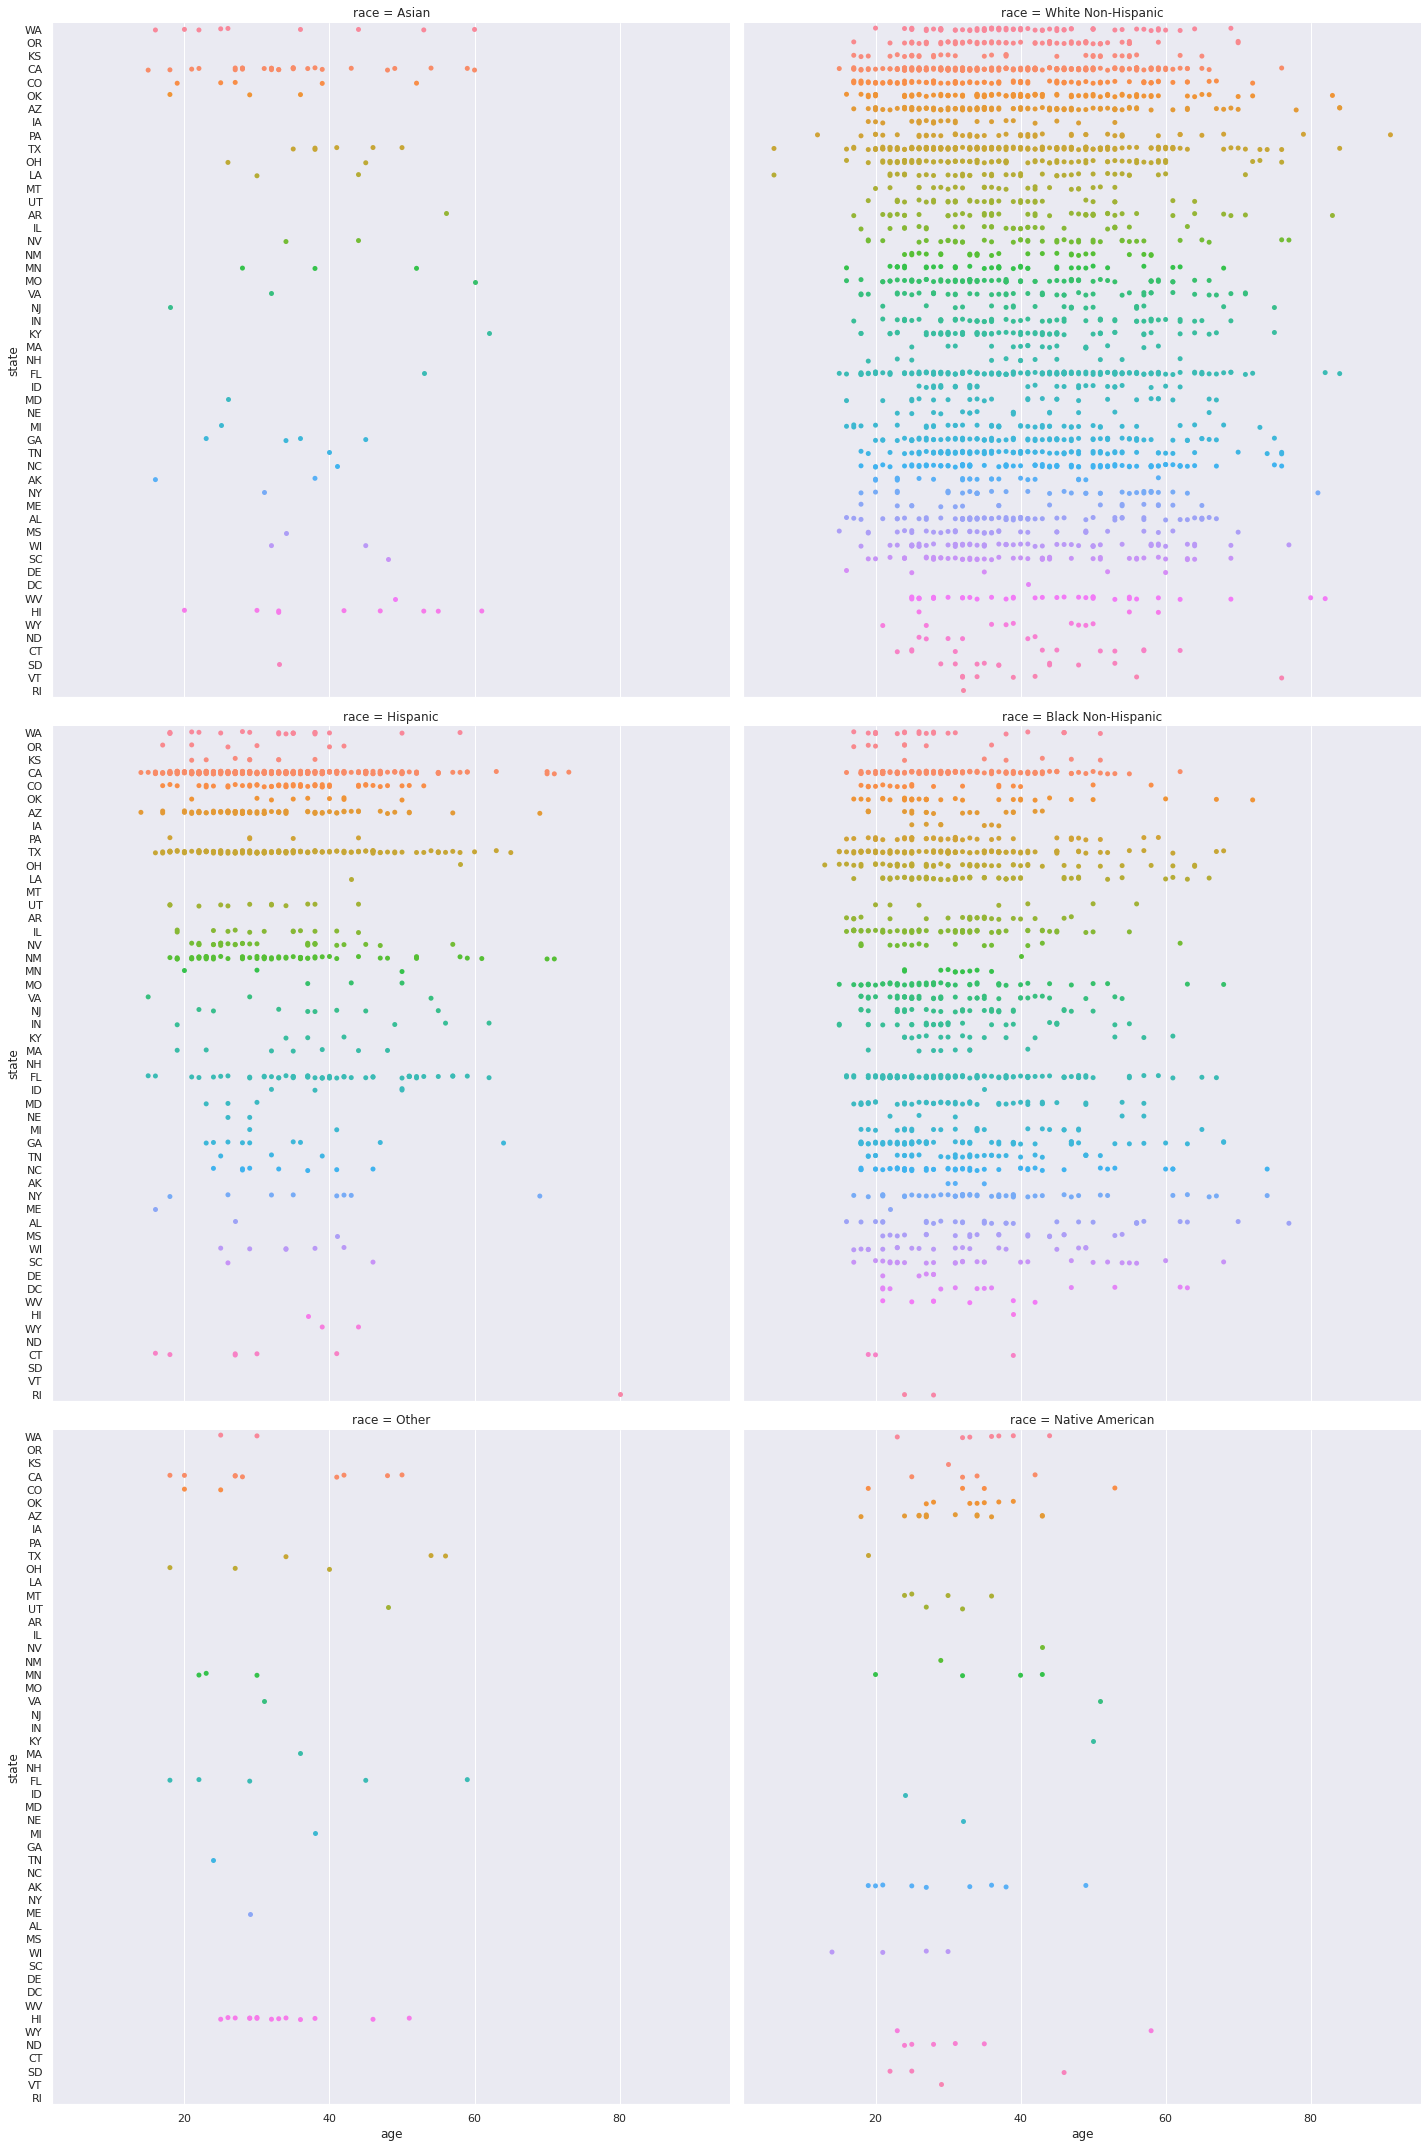

In [50]:
sns.catplot(x = 'age',y='state', kind = 'strip', data = df, col_wrap = 2, col = 'race', height = 10)

This shows whether age was a factor for the race the person belong to who was killed. This also takes into account the state where the incident happened.

**Insights** ->

1.) The state of California had the highest number of police shootings.

2.) People of all races between the age span of 20-40 were killed the most. White non-hispanic were the race that was killed the most followed by Black Non-Hispanic.

3.) The rate of shooting for each year is almost 1000 people being killed by the officers.